# **PERCEPTRON** 👁️

this script is for setup, execution, and evaluation of the perceptron algorithm

In [10]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import funcs as f
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
'''
Set clf, import data from data_organization.ipynb, and set random seed

'''
clf = Perceptron(max_iter=1000000)

df_all = pd.read_csv('../data/df_all.csv').drop('Unnamed: 0', axis = 1)
df_gus = pd.read_csv('../data/df_gus.csv').drop('Unnamed: 0', axis = 1)
df_tgus = pd.read_csv('../data/df_tgus.csv').drop('Unnamed: 0', axis = 1)
df_tgus_st = pd.read_csv('../data/df_tgus*.csv').drop('Unnamed: 0', axis = 1)
df_raw = pd.read_csv('../data/df_raw.csv').drop('Unnamed: 0', axis = 1)

np.random.seed(8)

<AxesSubplot:xlabel='pcoef', ylabel='gus'>

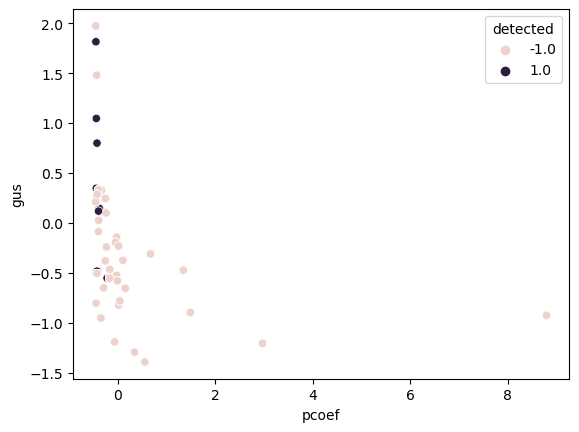

In [12]:
sns.scatterplot(x='pcoef', y='gus', hue='detected', data = df_all)

<AxesSubplot:xlabel='Poorly drained', ylabel='Well drained'>

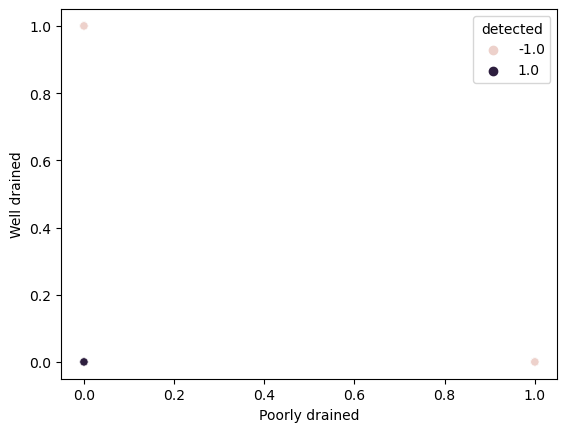

In [13]:
sns.scatterplot(x = 'Poorly drained', y = 'Well drained', hue = 'detected', data = df_all)

In [14]:
'''
Considering GUS, TGUS,  TGUS*, and raw values with other features

'''
all_train =[]
all_vals =[]
all_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_all, clf, 'perceptron')
    all_train = np.append(train_acc, all_train)
    all_vals = np.append(val_acc, all_vals)
    all_tests = np.append(test_acc, all_tests)

    # keep best model
    if test_acc >= np.max(all_tests):
        all_model = model
        all_train_acc = train_acc
        all_val_acc = val_acc
        all_test_acc = test_acc

print('All - Results:')
print(f'Best Scenario Training Accuracy: {all_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(all_train),1)}%')
print(f'Best Scenario Validation Accuracy: {all_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(all_vals),1)}%')
print(f'Best Scenario Test Accuracy: {all_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(all_tests),1)}%')


All - Results:
Best Scenario Training Accuracy: 96.0%
Average Training Accuracy: 93.7%
Best Scenario Validation Accuracy: 95.7%
Average Validation Accuracy: 96.0%
Best Scenario Test Accuracy: 97.2%
Average Test Accuracy: 89.6%


In [15]:
'''
Considering just GUS with other features

'''
gus_train =[]
gus_vals =[]
gus_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_gus, clf, 'perceptron')
    gus_train = np.append(train_acc, gus_train)
    gus_vals = np.append(val_acc, gus_vals)
    gus_tests = np.append(test_acc, gus_tests)

    # keep best model
    if test_acc >= np.max(gus_tests):
        gus_model = model
        gus_train_acc = train_acc
        gus_val_acc = val_acc
        gus_test_acc = test_acc

print('GUS - Results:')
print(f'Best Scenario Training Accuracy: {gus_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(gus_train),1)}%')
print(f'Best Scenario Validation Accuracy: {gus_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(gus_vals),1)}%')
print(f'Best Scenario Test Accuracy: {gus_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(gus_tests),1)}%')

GUS - Results:
Best Scenario Training Accuracy: 95.0%
Average Training Accuracy: 92.9%
Best Scenario Validation Accuracy: 94.3%
Average Validation Accuracy: 95.9%
Best Scenario Test Accuracy: 97.2%
Average Test Accuracy: 90.4%


In [16]:
'''
Considering just TGUS with other features

'''
tgus_train =[]
tgus_vals =[]
tgus_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_tgus, clf, 'perceptron')
    tgus_train = np.append(train_acc, tgus_train)
    tgus_vals = np.append(val_acc, tgus_vals)
    tgus_tests = np.append(test_acc, tgus_tests)

    # keep best model
    if test_acc >= np.max(tgus_tests):
        tgus_model = model
        tgus_train_acc = train_acc
        tgus_val_acc = val_acc
        tgus_test_acc = test_acc

print('TGUS - Results:')
print(f'Best Scenario Training Accuracy: {tgus_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(tgus_train),1)}%')
print(f'Best Scenario Validation Accuracy: {tgus_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(tgus_vals),1)}%')
print(f'Best Scenario Test Accuracy: {tgus_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(tgus_tests),1)}%')

TGUS - Results:
Best Scenario Training Accuracy: 93.0%
Average Training Accuracy: 92.2%
Best Scenario Validation Accuracy: 93.0%
Average Validation Accuracy: 94.7%
Best Scenario Test Accuracy: 96.2%
Average Test Accuracy: 88.7%


In [17]:
'''
Considering just TGUS* and raw values with other features

'''
tgus_st_train =[]
tgus_st_vals =[]
tgus_st_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_tgus_st, clf, 'perceptron')
    tgus_st_train = np.append(train_acc, tgus_st_train)
    tgus_st_vals = np.append(val_acc, tgus_st_vals)
    tgus_st_tests = np.append(test_acc, tgus_st_tests)

    # keep best model
    if test_acc >= np.max(tgus_st_tests):
        tgus_st_model = model
        tgus_st_train_acc = train_acc
        tgus_st_val_acc = val_acc
        tgus_st_test_acc = test_acc

print('TGUS* - Results:')
print(f'Best Scenario Training Accuracy: {tgus_st_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(tgus_st_train),1)}%')
print(f'Best Scenario Validation Accuracy: {tgus_st_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(tgus_st_vals),1)}%')
print(f'Best Scenario Test Accuracy: {tgus_st_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(tgus_st_tests),1)}%')

TGUS* - Results:
Best Scenario Training Accuracy: 88.0%
Average Training Accuracy: 91.4%
Best Scenario Validation Accuracy: 97.1%
Average Validation Accuracy: 94.1%
Best Scenario Test Accuracy: 98.1%
Average Test Accuracy: 89.4%


In [18]:
'''
Considering just raw values with other features

'''
raw_train =[]
raw_vals =[]
raw_tests=[]
for i in range(30):
    model, train_acc, val_acc, test_acc = f.kfold_crossval(df_raw, clf, 'perceptron')
    raw_train = np.append(train_acc, raw_train)
    raw_vals = np.append(val_acc, raw_vals)
    raw_tests = np.append(test_acc, raw_tests)

    # keep best model
    if test_acc >= np.max(raw_tests):
        raw_model = model
        raw_train_acc = train_acc
        raw_val_acc = val_acc
        raw_test_acc = test_acc

print('Raw - Results:')
print(f'Best Scenario Training Accuracy: {raw_train_acc}%')
print(f'Average Training Accuracy: {round(np.mean(raw_train),1)}%')
print(f'Best Scenario Validation Accuracy: {raw_val_acc}%')
print(f'Average Validation Accuracy: {round(np.mean(raw_vals),1)}%')
print(f'Best Scenario Test Accuracy: {raw_test_acc}%')
print(f'Average Test Accuracy: {round(np.mean(raw_tests),1)}%')

Raw - Results:
Best Scenario Training Accuracy: 92.0%
Average Training Accuracy: 93.5%
Best Scenario Validation Accuracy: 92.9%
Average Validation Accuracy: 95.6%
Best Scenario Test Accuracy: 95.3%
Average Test Accuracy: 88.3%
